In [4]:
import pandas as pd
import numpy as np
import pickle

from IPython.display import display

from matplotlib import pyplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_text

%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv("train.csv")
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2008,Developing,61.4,29.0,11,0.81,103.727773,59.0,0,43.4,...,76.0,4.60,63.0,1.3,1178.724690,6787187.0,1.4,1.3,0.469,8.9
1,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,23.4,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2,2007,Developing,78.9,93.0,1,4.20,150.889148,89.0,0,52.4,...,89.0,8.37,89.0,0.1,612.623418,4369469.0,1.9,1.9,0.734,12.8
3,2002,Developing,59.3,33.0,19,6.10,50.285582,NaN,0,35.6,...,54.0,5.47,48.0,4.8,393.163270,8834733.0,4.6,4.7,0.444,8.0
4,2002,Developing,47.7,473.0,65,3.13,0.000000,48.0,5882,2.4,...,7.0,4.47,64.0,6.9,NaN,NaN,7.7,7.7,NaN,NaN


In [3]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
# Check for duplicates

df.duplicated().any()

False

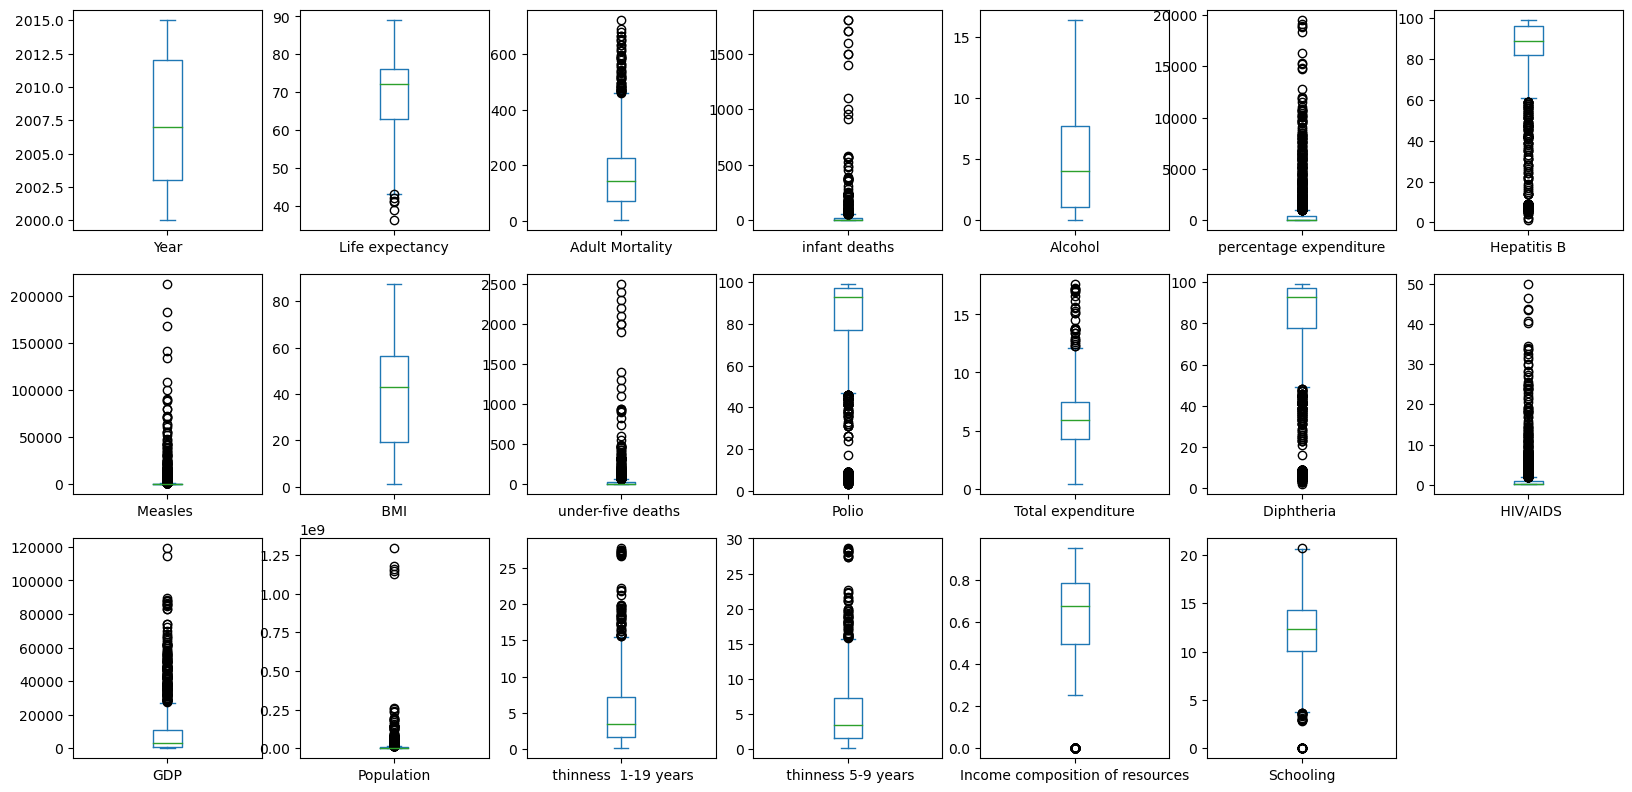

In [6]:
# Check for outliers

# Box and Whisker Plots

data = df 
data.plot(kind='box', subplots=True, layout=(6,7), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

In [4]:
# Remove space and convert to lower case for columns names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2132 non-null   int64  
 1   status                           2132 non-null   object 
 2   life_expectancy                  2125 non-null   float64
 3   adult_mortality                  2125 non-null   float64
 4   infant_deaths                    2132 non-null   int64  
 5   alcohol                          2035 non-null   float64
 6   percentage_expenditure           2132 non-null   float64
 7   hepatitis_b                      1850 non-null   float64
 8   measles                          2132 non-null   int64  
 9   bmi                              2115 non-null   float64
 10  under-five_deaths                2132 non-null   int64  
 11  polio                            2124 non-null   float64
 12  total_expenditure   

In [5]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [6]:
df.Year.nunique()

16

In [6]:
df.isnull().sum()

year                                 0
status                               0
life_expectancy                      7
adult_mortality                      7
infant_deaths                        0
alcohol                             97
percentage_expenditure               0
hepatitis_b                        282
measles                              0
bmi                                 17
under-five_deaths                    0
polio                                8
total_expenditure                  118
diphtheria                           8
hiv/aids                             0
gdp                                221
population                         326
thinness__1-19_years                17
thinness_5-9_years                  17
income_composition_of_resources     87
schooling                           84
dtype: int64

In [5]:
# Dropping observations where the values are missing for the target variable

df.dropna(subset = ["life_expectancy"], inplace = True)

In [38]:
df.isnull().sum()

year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                             97
percentage_expenditure               0
hepatitis_b                        282
measles                              0
bmi                                 15
under-five_deaths                    0
polio                                8
total_expenditure                  118
diphtheria                           8
hiv/aids                             0
gdp                                217
population                         320
thinness__1-19_years                15
thinness_5-9_years                  15
income_composition_of_resources     81
schooling                           81
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 0 to 2131
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2125 non-null   int64  
 1   status                           2125 non-null   object 
 2   life_expectancy                  2125 non-null   float64
 3   adult_mortality                  2125 non-null   float64
 4   infant_deaths                    2125 non-null   int64  
 5   alcohol                          2028 non-null   float64
 6   percentage_expenditure           2125 non-null   float64
 7   hepatitis_b                      1843 non-null   float64
 8   measles                          2125 non-null   int64  
 9   bmi                              2110 non-null   float64
 10  under-five_deaths                2125 non-null   int64  
 11  polio                            2117 non-null   float64
 12  total_expenditure   

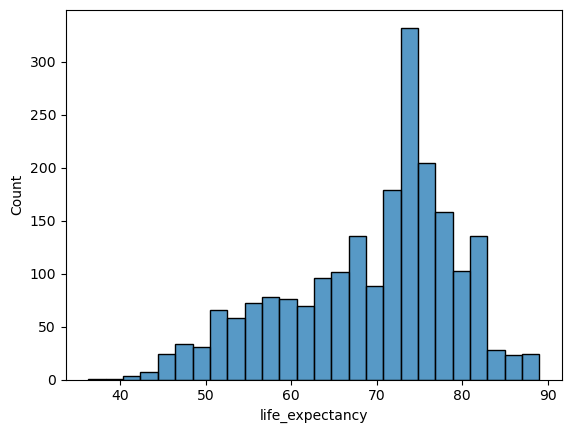

In [40]:
sns.histplot(df.life_expectancy);

In [ ]:
# The Target feature has a long tail, hence the np.log1p was applied to it

In [6]:
def prepare_data_split(df, test_size, random_state, target_feature):
    '''
    Fuunction Split a dataset(df) in the ratio 60%/20%/20% == Train/Validation/Test
    
    return the train, Validation and Test dataset with their corresponding targer variable
    '''
    df_full_train, df_test = train_test_split(df, test_size= test_size, random_state=random_state)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_full_train = df_full_train.reset_index(drop=True)
    
    y_train = np.log1p(df_train[target_feature].values)
    y_val = np.log1p(df_val[target_feature].values)
    y_test = np.log1p(df_test[target_feature].values)
    y_full_train = np.log1p(df_full_train[target_feature].values)
    
    del df_train[target_feature]
    del df_val[target_feature]
    del df_test[target_feature]
    del df_full_train[target_feature]
    
    print(f"Length of Train: {len(df_train)}, Length of Validation: {len(df_val)}, Length of Test: {len(df_test)}")
    print()
    return df_train, y_train, df_val, y_val, df_test, y_test, df_full_train, y_full_train

In [7]:
# Setup Validation framework for logistic regression for dataset df_final

test_size = 0.2
random_state = 1
target = "life_expectancy"
df_train, y_train, df_val, y_val, df_test, y_test, df_full_train, y_full_train = prepare_data_split(df,
                                                                                                    test_size,
                                                                                                    random_state, 
                                                                                                    target)

Length of Train: 1275, Length of Validation: 425, Length of Test: 425



In [10]:
# Applying the DictVectorizer

dv = DictVectorizer(sparse = False)

train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

train_full_dicts = df_full_train.fillna(0).to_dict(orient='records')
X_full_train = dv.transform(train_full_dicts)

In [12]:
# Training a random forest Regressor

rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("RMSE: ", rmse)

RMSE:  0.037097049425004934


,n_estimators,rmse
0,10,0.037097
1,20,0.036012
2,30,0.034834
3,40,0.034387
4,50,0.034106


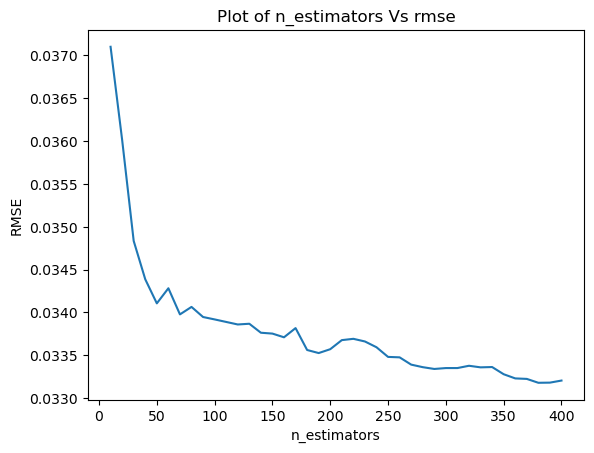

In [15]:
# Parameter tuning

scores = []

for n in range(10, 401, 10):
    rf_model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)

    scores.append((n, np.sqrt(mse)))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
display(df_scores.head())

#plot 

plt.plot(df_scores.n_estimators, df_scores.rmse)

plt.xlabel("n_estimators")
plt.title("Plot of n_estimators Vs rmse")
plt.ylabel("RMSE");

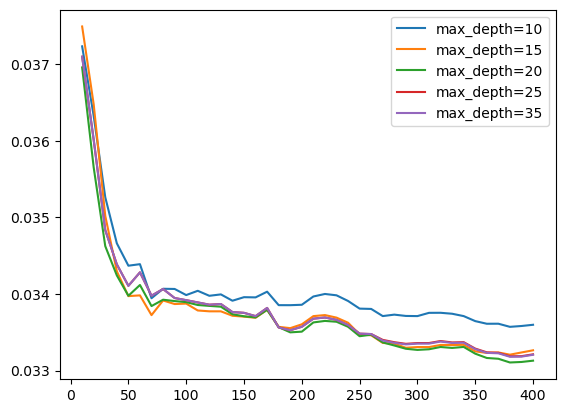

In [17]:
# Further parameter tuning

score_rmse = []

for d in [10, 15, 20, 25, 35]:
    for n in range(10, 401, 10):
        #rmse_scores = []
        rf = RandomForestRegressor(n_estimators=n, random_state=1, max_depth=d, n_jobs=-1)

        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        score_rmse.append((d, n, rmse))
    
    
df_scores = pd.DataFrame(score_rmse, columns = ['max_depth', 'n_estimators', 'rmse'])

for d in [10, 15, 20, 25, 35]:
    df_sb = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_sb.n_estimators, df_sb.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [18]:
# Training Final Random forest model

rf_final = RandomForestRegressor(n_estimators=375, random_state=1, max_depth = 20, n_jobs=-1)

rf_final.fit(X_train, y_train)

y_pred = rf_final.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("RMSE: ", rmse)

RMSE:  0.03314791745409977


In [19]:
# Access feature importances
feature_importances = rf_final.feature_importances_

feature_names=dv.get_feature_names_out()
feat_imp = pd.Series(feature_importances, index = feature_names)
feat_imp

adult_mortality                    0.166300
alcohol                            0.009530
bmi                                0.024091
diphtheria                         0.010636
gdp                                0.002108
hepatitis_b                        0.002361
hiv/aids                           0.634237
income_composition_of_resources    0.082219
infant_deaths                      0.004982
measles                            0.003927
percentage_expenditure             0.002556
polio                              0.006769
population                         0.002466
schooling                          0.012186
status=Developed                   0.000150
status=Developing                  0.000211
thinness_5-9_years                 0.007967
thinness__1-19_years               0.005798
total_expenditure                  0.003918
under-five_deaths                  0.010977
year                               0.006611
dtype: float64

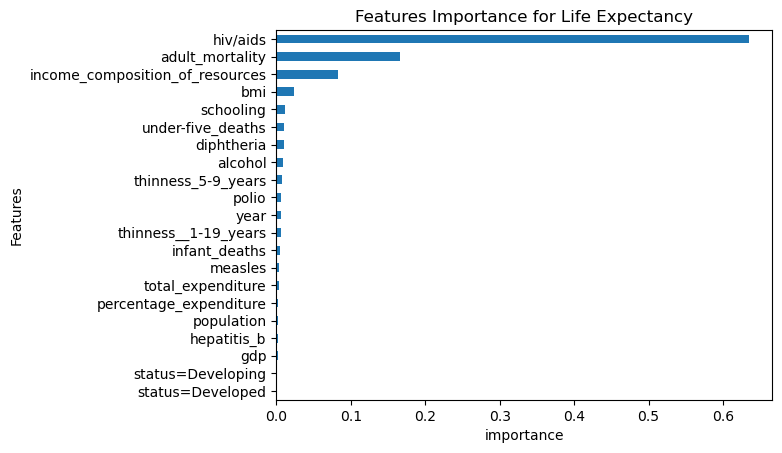

In [20]:
# Bar chart of importance of each feature to the prediction

feat_imp.sort_values().plot(kind = "barh")

plt.xlabel("importance")
plt.ylabel("Features")
plt.title("Features Importance for Life Expectancy");

In [23]:
# Final Random forest model with full train dataset

rf_final_full = RandomForestRegressor(n_estimators=375, random_state=1, max_depth = 20, n_jobs=-1)

rf_final_full.fit(X_full_train, y_full_train)

y_pred = rf_final_full.predict(X_val)

# Evaluate the model
rmse_full = np.sqrt(mean_squared_error(y_val, y_pred))

print("RMSE: ", rmse_full)

RMSE:  0.011968759773223129


In [59]:
y_pred = rf_final_full.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  0.03110625472463191


In [67]:
# Data point to use for model testing

df.iloc[100, :].to_dict()

{'year': 2004,
 'status': 'Developing',
 'life_expectancy': 64.8,
 'adult_mortality': 214.0,
 'infant_deaths': 0,
 'alcohol': 0.48,
 'percentage_expenditure': 10.6242741,
 'hepatitis_b': 67.0,
 'measles': 0,
 'bmi': 71.4,
 'under-five_deaths': 0,
 'polio': 61.0,
 'total_expenditure': 1.39,
 'diphtheria': 62.0,
 'hiv/aids': 0.1,
 'gdp': 113.6286,
 'population': 9542.0,
 'thinness__1-19_years': 0.2,
 'thinness_5-9_years': 0.2,
 'income_composition_of_resources': 0.0,
 'schooling': 12.4}

In [40]:
# Save your model as `"model_rf_1.pkl"`
with open("model_rf_1.pkl", "wb") as f:
    pickle.dump(rf_final_full, f)
    
with open("model_dv.pkl", "wb") as f:
    pickle.dump(dv, f)

In [26]:
# Train model with XGBoost 

features = dv.get_feature_names_out()
features = features.tolist()

# Clean up feature names to remove invalid characters
cleaned_features = [name.replace("[", "").replace("]", "")
                    .replace("<", "").replace(">", "").replace(" ", "_") for name in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=cleaned_features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=cleaned_features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=cleaned_features)

In [27]:
# Create Watchlist

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [28]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [29]:
scores = {}

In [32]:
%%capture output

xgb_params = {
        'eta': 0.1, 
        'max_depth': 20,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }
model = xgb.train(xgb_params, dtrain, 
                      num_boost_round=375,
                      evals=watchlist)


In [33]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

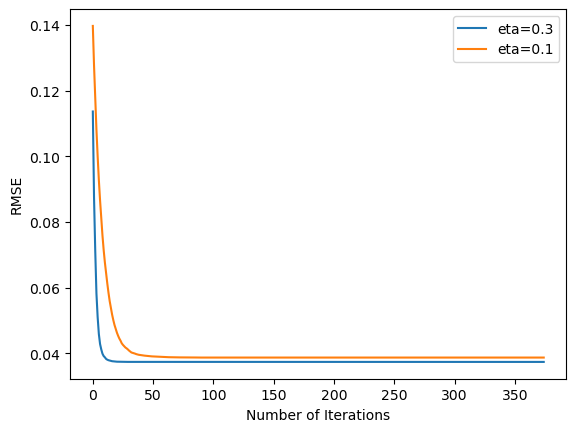

In [34]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")
plt.legend();

In [35]:
xgb_params = {
        'eta': 0.3, 
        'max_depth': 20,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }
model = xgb.train(xgb_params, dtrain, 
                      num_boost_round=375,
                      evals=watchlist)

[0]	train-rmse:0.10752	val-rmse:0.11367
[1]	train-rmse:0.07869	val-rmse:0.08752
[2]	train-rmse:0.05825	val-rmse:0.07126
[3]	train-rmse:0.04348	val-rmse:0.05820
[4]	train-rmse:0.03287	val-rmse:0.05099
[5]	train-rmse:0.02503	val-rmse:0.04585
[6]	train-rmse:0.01933	val-rmse:0.04280
[7]	train-rmse:0.01499	val-rmse:0.04115
[8]	train-rmse:0.01178	val-rmse:0.03985
[9]	train-rmse:0.00933	val-rmse:0.03913
[10]	train-rmse:0.00745	val-rmse:0.03874
[11]	train-rmse:0.00597	val-rmse:0.03826
[12]	train-rmse:0.00482	val-rmse:0.03802
[13]	train-rmse:0.00392	val-rmse:0.03786
[14]	train-rmse:0.00320	val-rmse:0.03775
[15]	train-rmse:0.00264	val-rmse:0.03766
[16]	train-rmse:0.00219	val-rmse:0.03756
[17]	train-rmse:0.00182	val-rmse:0.03752
[18]	train-rmse:0.00152	val-rmse:0.03748
[19]	train-rmse:0.00128	val-rmse:0.03744
[20]	train-rmse:0.00109	val-rmse:0.03741
[21]	train-rmse:0.00094	val-rmse:0.03740
[22]	train-rmse:0.00082	val-rmse:0.03739
[23]	train-rmse:0.00071	val-rmse:0.03737
[24]	train-rmse:0.00063	va

[198]	train-rmse:0.00044	val-rmse:0.03734
[199]	train-rmse:0.00044	val-rmse:0.03734
[200]	train-rmse:0.00044	val-rmse:0.03734
[201]	train-rmse:0.00044	val-rmse:0.03734
[202]	train-rmse:0.00044	val-rmse:0.03734
[203]	train-rmse:0.00044	val-rmse:0.03734
[204]	train-rmse:0.00044	val-rmse:0.03734
[205]	train-rmse:0.00044	val-rmse:0.03734
[206]	train-rmse:0.00044	val-rmse:0.03734
[207]	train-rmse:0.00044	val-rmse:0.03734
[208]	train-rmse:0.00044	val-rmse:0.03734
[209]	train-rmse:0.00044	val-rmse:0.03734
[210]	train-rmse:0.00044	val-rmse:0.03734
[211]	train-rmse:0.00044	val-rmse:0.03734
[212]	train-rmse:0.00044	val-rmse:0.03734
[213]	train-rmse:0.00044	val-rmse:0.03734
[214]	train-rmse:0.00044	val-rmse:0.03734
[215]	train-rmse:0.00044	val-rmse:0.03734
[216]	train-rmse:0.00044	val-rmse:0.03734
[217]	train-rmse:0.00044	val-rmse:0.03734
[218]	train-rmse:0.00044	val-rmse:0.03734
[219]	train-rmse:0.00044	val-rmse:0.03734
[220]	train-rmse:0.00044	val-rmse:0.03734
[221]	train-rmse:0.00044	val-rmse:

In [36]:
y_pred = model.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  0.03783848419928661


In [ ]:
# XGBoost model did not perform better than Random forest Regressor model

In [ ]:
# Random Forest Regressor model was selected as the best model and used for the project with the hyper parameters